A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to **predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.**

## Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [15, 6]

## Read the data

In [3]:
train =pd.read_csv('train.csv')
test =pd.read_csv('test.csv')

In [4]:
combined = pd.concat([train,test],ignore_index=True)
combined

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [5]:
print(train.shape,test.shape,combined.shape)

(550068, 12) (233599, 11) (783667, 12)


In [6]:
#  What defines the Customer's Purchase Habits...
combined.columns

# Gender, Age, Occupation, Stay in Current City...
# marital status, City Category...

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [8]:
combined.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667,783667,783667,783667.000000,783667,783667,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
unique,NaN,3677,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,2709,590031,313015,NaN,329739,276425,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.079300,NaN,NaN,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,NaN,NaN,NaN,6.522206,NaN,NaN,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


- Age is binned.
- If there is any popular PRODUCT ID - P00265242
- Most of the transactions are done by Males.
- People in the age bracket of 26-35 are purchasing more than the rest.
- People from City Category B are purchasing the most.
- The Purchase Variable has min of $12 and Max of 23961 dollars

## Missing values

In [9]:
per = combined.isnull().sum()/len(combined)*100
count = combined.isnull().sum()
pd.DataFrame({'null':count,'Percentage':per}).sort_values(by='Percentage',ascending=False)

,null,Percentage
Product_Category_3,545809,69.648078
Product_Category_2,245982,31.388587
Purchase,233599,29.808452
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000


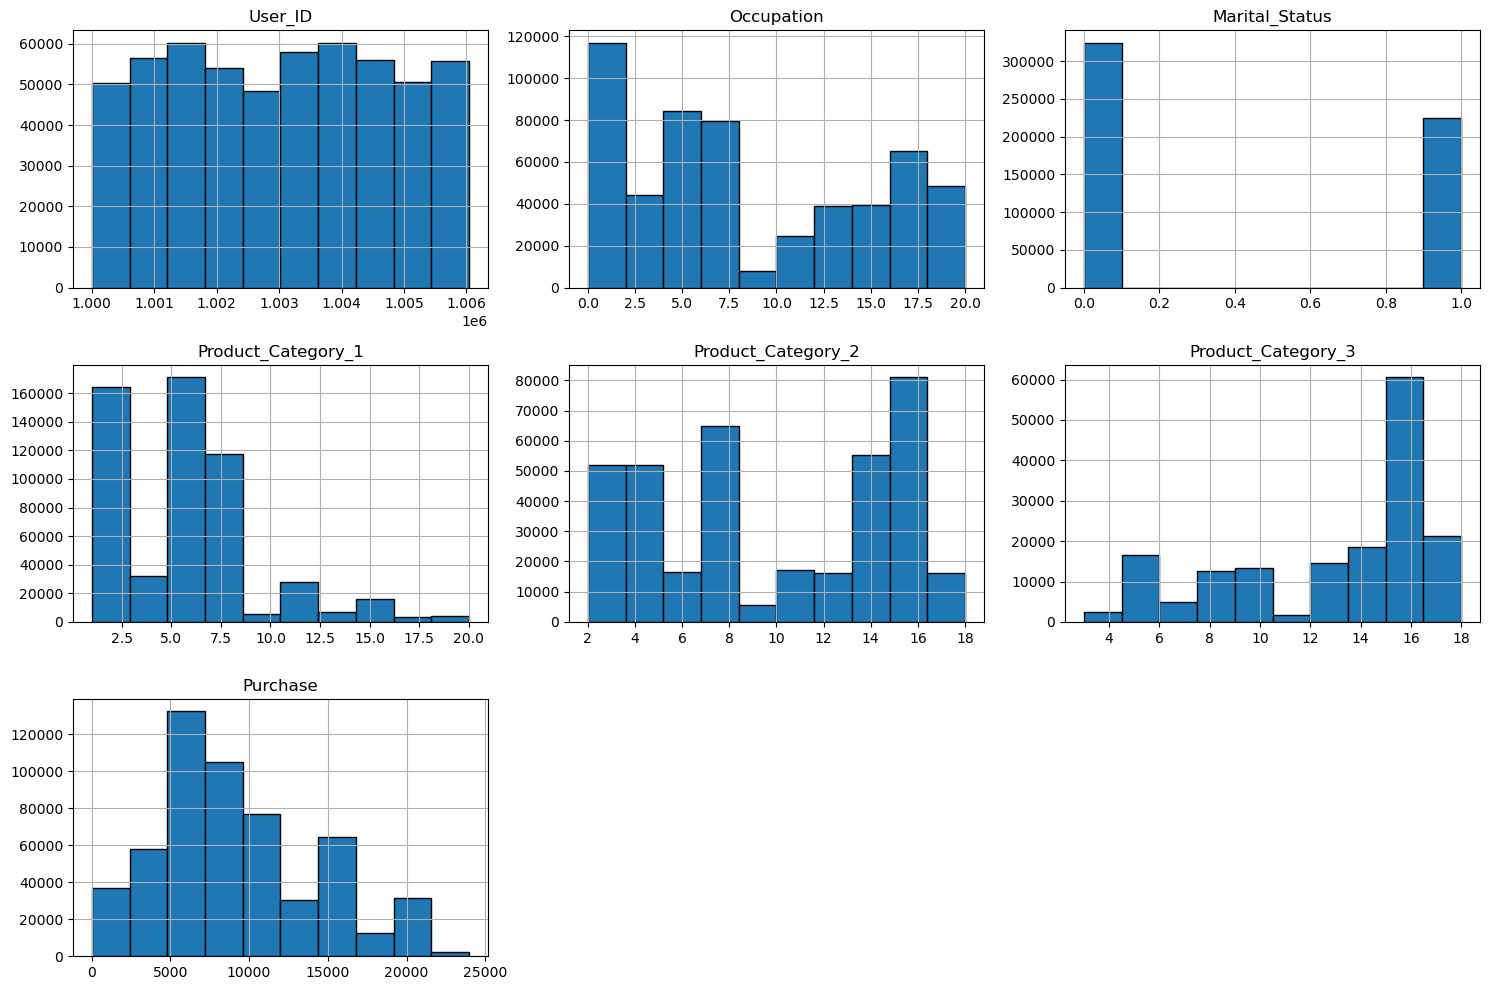

In [10]:
train.hist(edgecolor="black", figsize = (15, 10))
plt.tight_layout()
plt.show()

- 16 is the most preferred prod_cat for Customers in Prod Cat 3.

- Purchase is +vely Skewed.

- Prod_Cat2 - 16, 8 appears to be the preferred ones.

- We will explore this data more.

In [11]:
combined.Product_Category_1.mode(),combined.Product_Category_2.mode(), combined.Product_Category_3.mode()

(0    5
 Name: Product_Category_1, dtype: int64,
 0    8.0
 Name: Product_Category_2, dtype: float64,
 0    16.0
 Name: Product_Category_3, dtype: float64)

- 5, 8 and 16 appear to be the most popular products

In [12]:
# Split the Data in Num and Cat Variables
num_cols = combined.select_dtypes(include = np.number).columns
cat_cols = combined.select_dtypes(exclude = np.number).columns

In [13]:
# Fix the Marital Status
combined["Marital_Status"]=combined.Marital_Status.astype("object")

In [14]:
print(num_cols), print(cat_cols)

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')


(None, None)

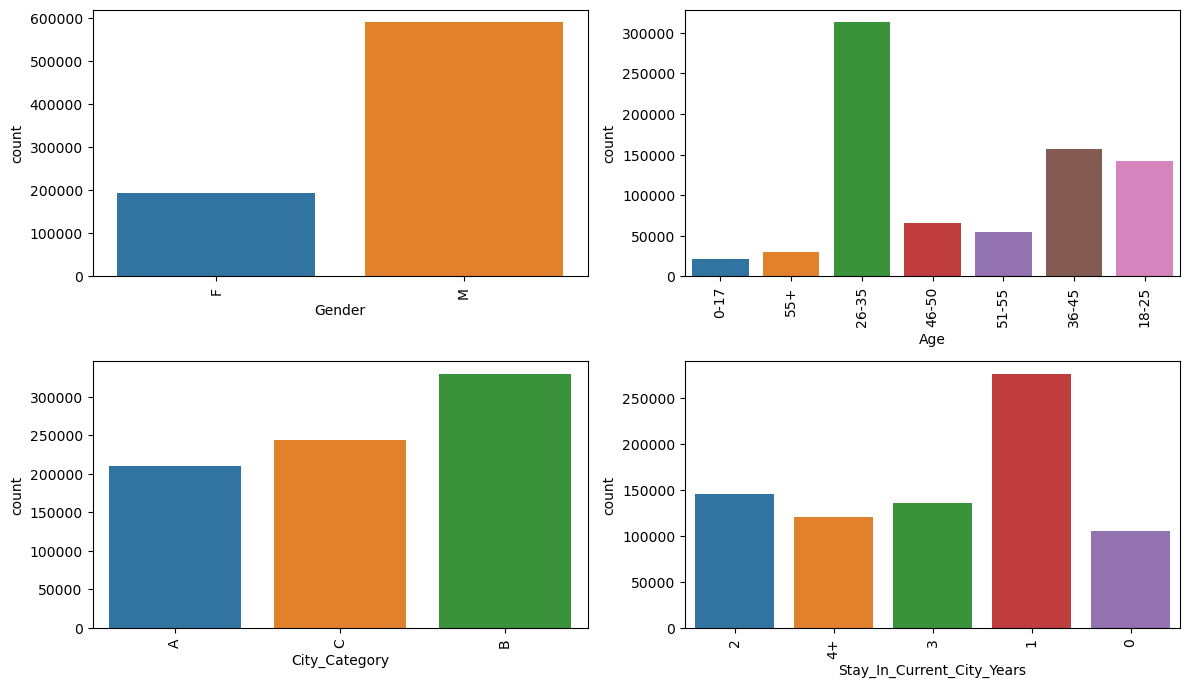

In [15]:
# Adjusting the subplot layout
a, b = 3, 2  # Number of rows and columns for subplots
c = 1  # Initial subplot position

plt.figure(figsize=[12,10])
for i in cat_cols[1:]:
    plt.subplot(a, b, c)
    sns.countplot(data=combined, x=i)  # 'data=' makes it more readable
    plt.xlabel(i)
    plt.xticks(rotation=90)  # This is placed inside the loop for each plot
    c += 1

plt.tight_layout()
plt.show()


- Males are more than females in this data and hence, it is clear that most of the purchase is done by males only.
- The most popular age bracket is 26-35 followed by 36-45
- City Cat B then C followed by A in the descending order of Purchase.
- Most of the people making purchase are Independent of any person in life.
- Most of them have stayed for min 1 year...

In [16]:
# Remove Special Character from Stay and Age
combined['Stay_In_Current_City'] = combined.Stay_In_Current_City_Years.str.strip("+").astype("float")

In [17]:
# Same will done in Age...
combined['Age'] = combined.Age.str.strip("+")

<Axes: xlabel='Age', ylabel='count'>

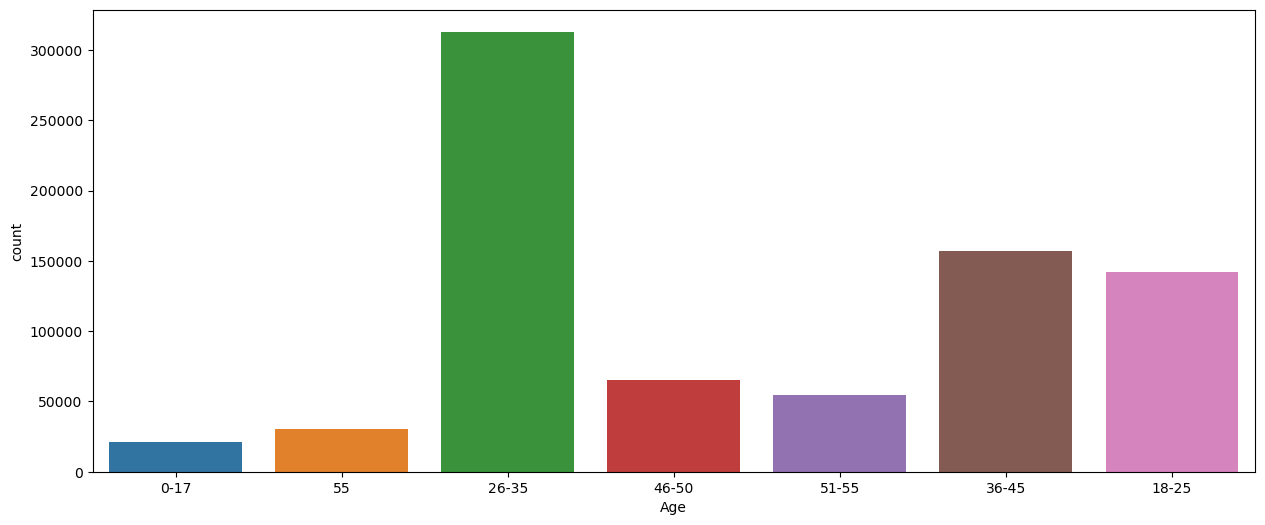

In [18]:
# Check the Age var
sns.countplot(x = "Age", data = combined)

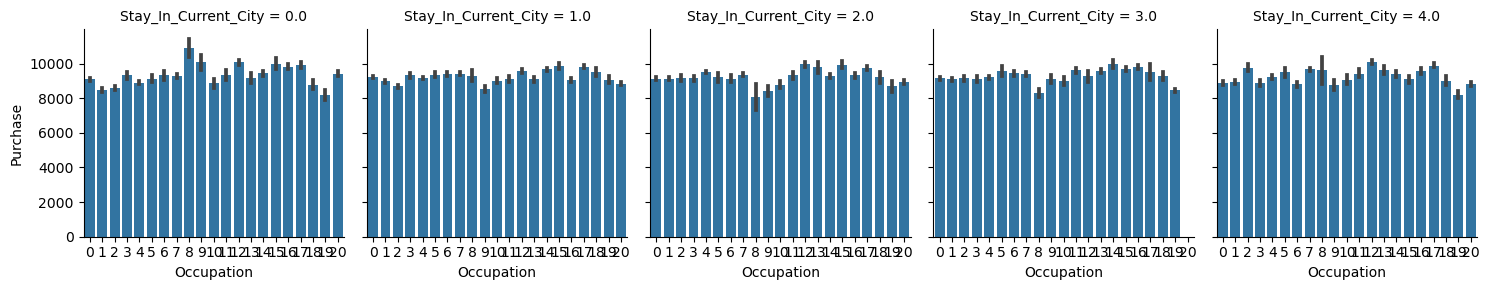

In [19]:
# Stay In City, Marital Status and Occupation has an effect on Tgt Variable...

# FacetGrid Plot

g = sns.FacetGrid(combined, col = "Stay_In_Current_City")
g.map(sns.barplot, "Occupation", "Purchase")
plt.show()

#Inference: that there is no effect on 
#Purchase irrespective of the Marital Status, his stay in current city & Occupation...

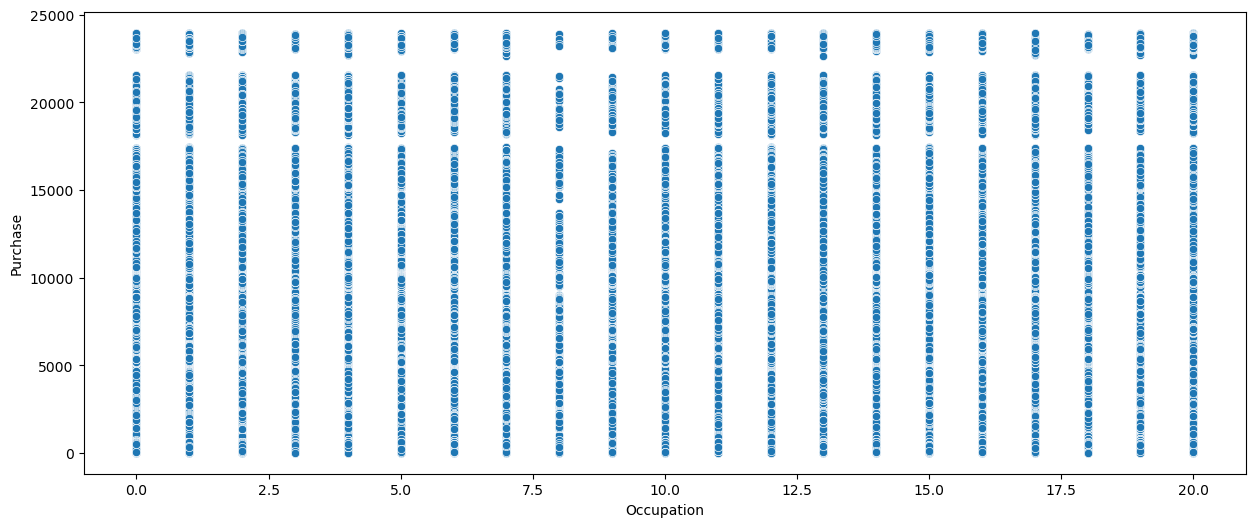

In [20]:
# Check the Occupation vs Purchase
sns.scatterplot(x='Occupation', y='Purchase', data=combined)
plt.show()

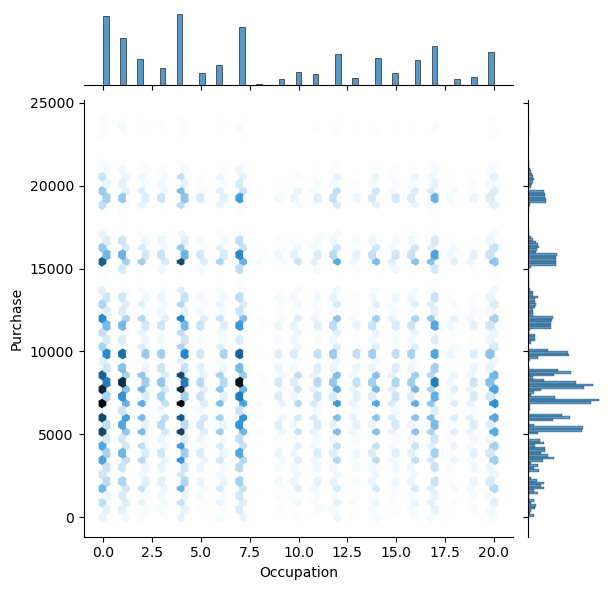

In [21]:
# hexplot or jointplot

sns.jointplot(x = "Occupation", y = "Purchase", data = combined, kind = "hex")
plt.show()

- Most of the Purchase is between 5000-10000 range.
- The Occupation in the range 0-7 have the highest purchase where 4 appears to be the profession where people make the most of the purchases.
## How this Info can be used
- Company can target Occupations between 0 - 7 and run marketing campaigns to encourage people to buy more.

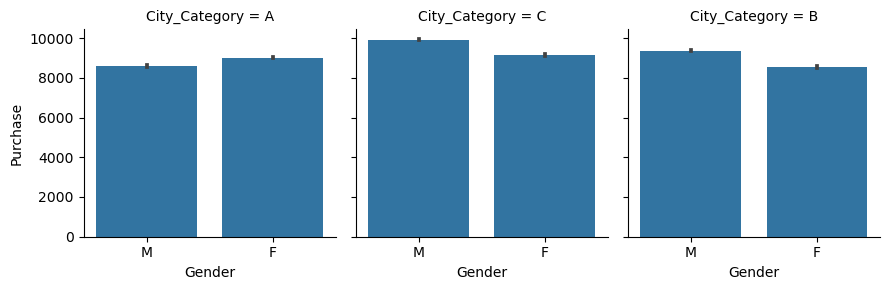

In [22]:
# Check City Category with Gender and Purchase...

g = sns.FacetGrid(combined, col = "City_Category") # Facetgrid Object
g.map(sns.barplot, "Gender", "Purchase") # func, x, y


# We see that City Category C has the highest no of Purchases Witnessed.
# For City Cat B & C, males tend to dominate the Purchase...
# Where as in City A, we see that females are the biggest spenders...

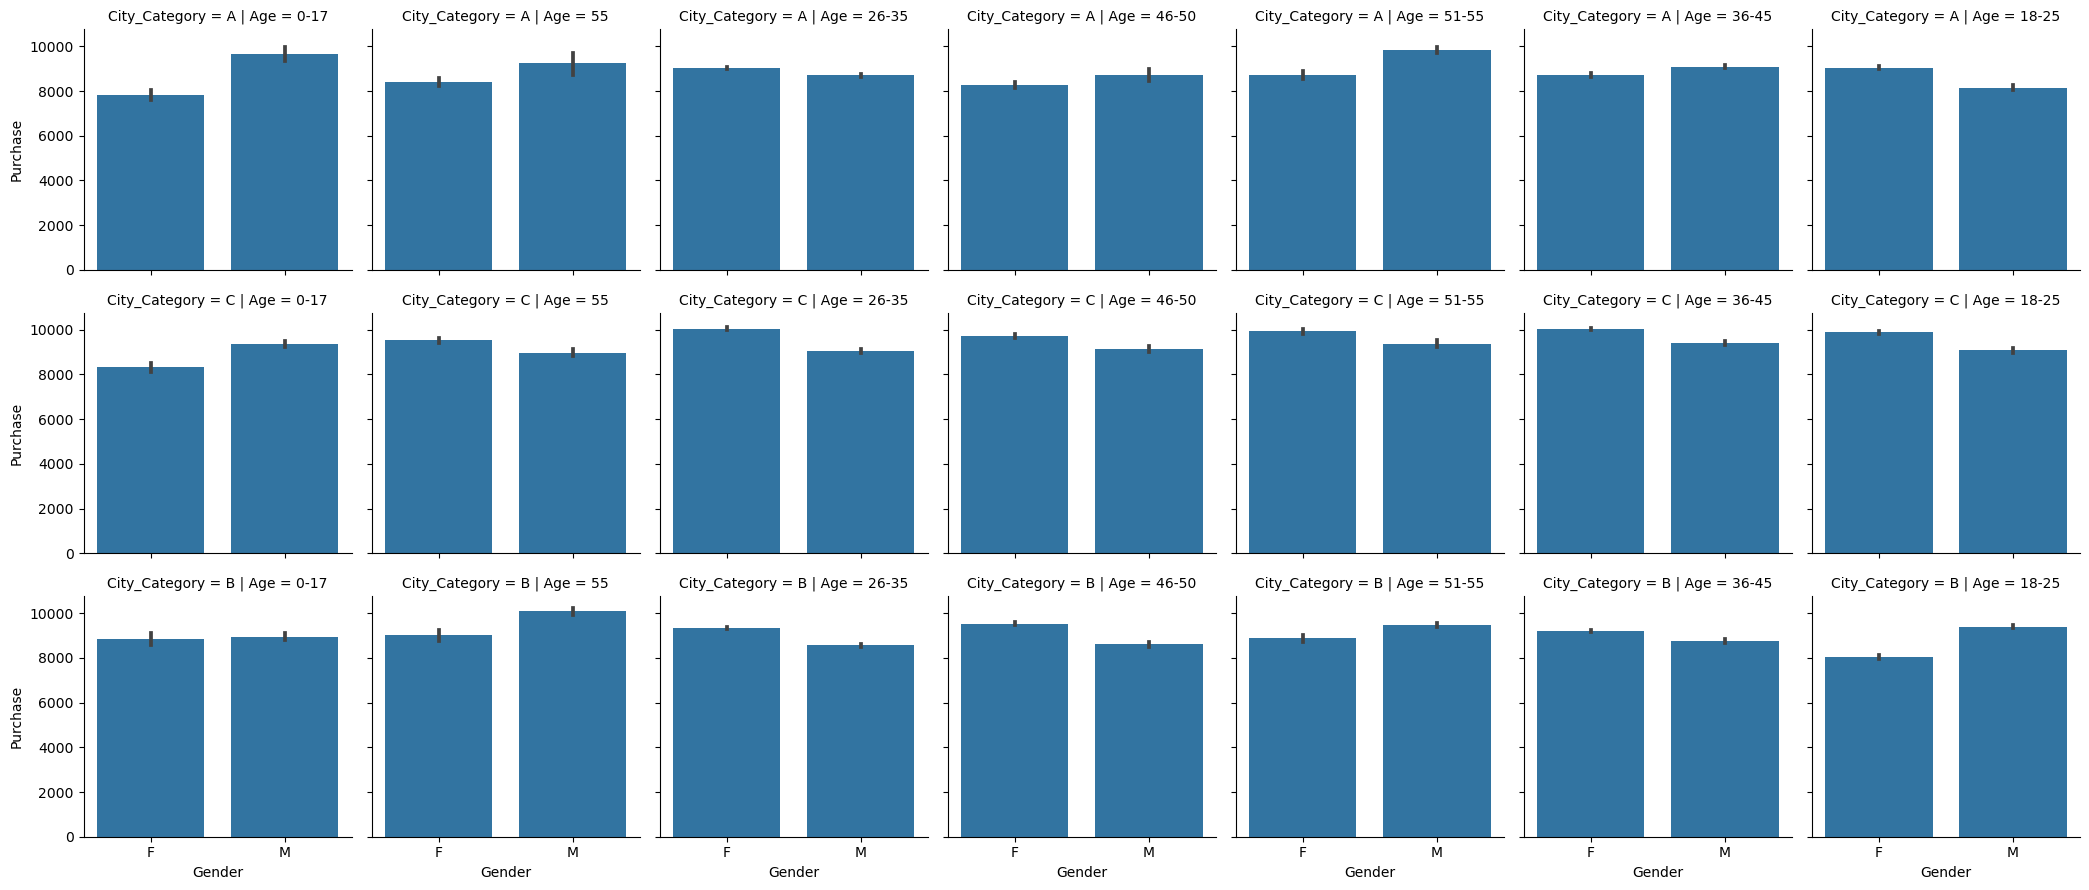

In [23]:
# Age, city category followed by Gender and Purchase.

g = sns.FacetGrid(combined, row = "City_Category", col = "Age") # Facetgrid Object
g.map(sns.barplot, "Gender", "Purchase") # func, x, y
plt.show()

- There are two age groups in the City Cat_A 26-35 and 18-25 for which the females have made lot of purchases.
- We can say that Age Bracket 26-35 and 18-25 in A City are the potential buyers...

In [24]:
# Deploying Statistical Test to Check the relation between marital stats and product_cat1

# Ho: That Prod Cat is Independent of the Gender
# Ha: That Prod Cat is Dependent on the Gender

import scipy.stats as stats

# Tabulate the Data
tabulate = pd.crosstab(combined.Gender, combined.Product_Category_1)

# Deploy the Test
teststats, pvalue, df, exp_freq = stats.chi2_contingency(tabulate)

# Print the Pvalue
print(pvalue)

0.0


<Axes: xlabel='Gender'>

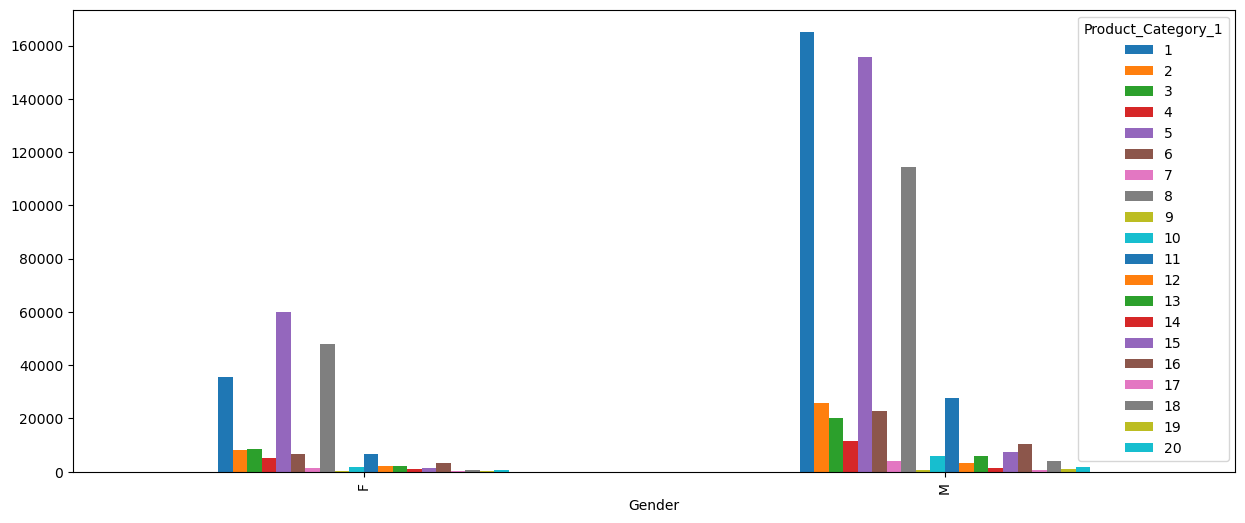

In [25]:
tabulate.plot(kind ="bar")

In [26]:
combined['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

<Axes: xlabel='Product_Category_3', ylabel='count'>

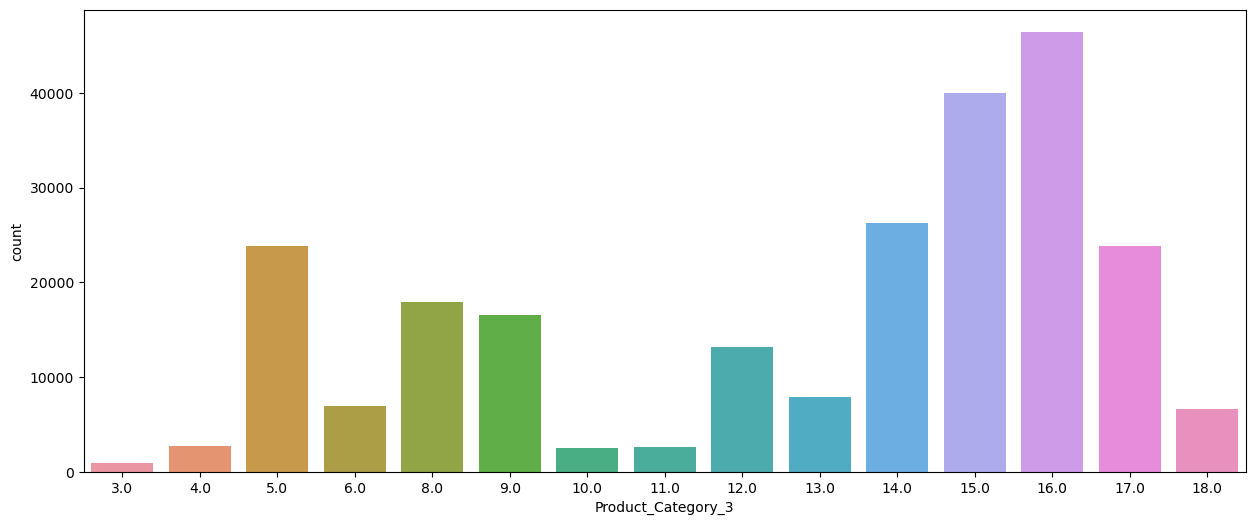

In [27]:
# With Product Category, Take Where the Gender == Male, Product Category median value

sns.countplot(data = combined,x='Product_Category_3')

In [28]:
# Does City Category has any role in Product Category

# Ho: That Prod Cat is Independent of the City Category
# Ha: That Prod Cat is Dependent on the City Category

import scipy.stats as stats

# Tabulate the Data
tabulate = pd.crosstab(combined.City_Category, combined.Product_Category_1)

# Deploy the Test
teststats, pvalue, df, exp_freq = stats.chi2_contingency(tabulate)

# Print the Pvalue
print(pvalue)

0.0


<Axes: xlabel='City_Category'>

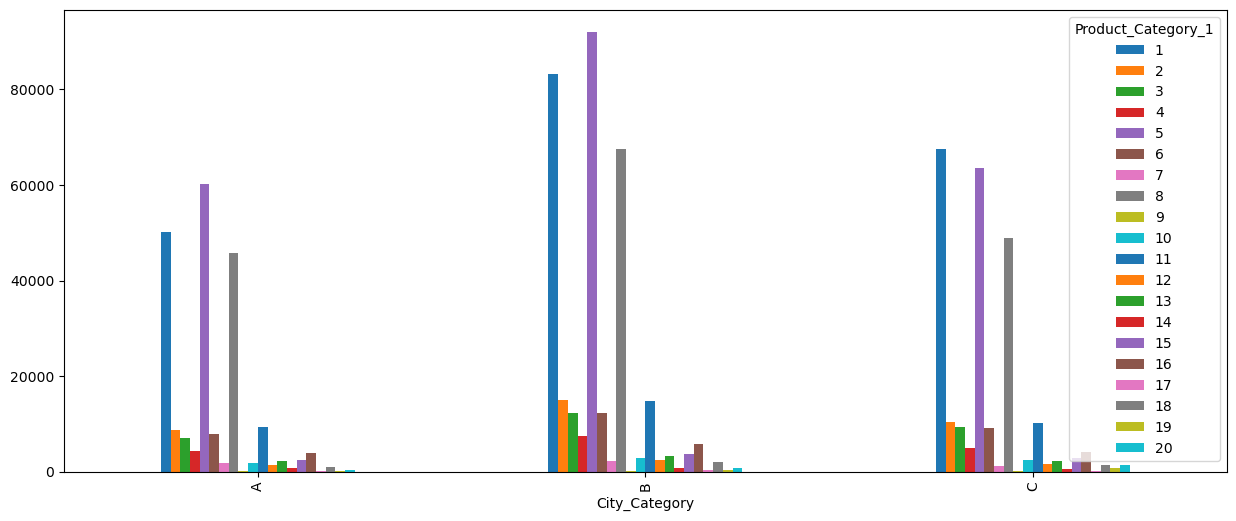

In [29]:
tabulate.plot(kind='bar')

In [30]:
combined.groupby(["City_Category", "Gender"])["Product_Category_2"].describe()

count       mean       std  min  25%   50%   75%  \
City_Category Gender                                                        
A             F        33582.0  10.124710  4.798571  2.0  6.0  11.0  14.0   
              M       106543.0   9.895713  5.092870  2.0  5.0   9.0  15.0   
B             F        55225.0   9.994006  4.853629  2.0  5.0  10.0  14.0   
              M       169990.0   9.768433  5.148369  2.0  5.0   9.0  15.0   
C             F        42014.0   9.923502  4.950752  2.0  5.0  10.0  14.0   
              M       130331.0   9.740852  5.215808  2.0  5.0   9.0  15.0   

                       max  
City_Category Gender        
A             F       18.0  
              M       18.0  
B             F       18.0  
              M       18.0  
C             F       18.0  
              M       18.0

In [31]:
# Impute the Missing Values in Prod_Cat_2

# City Condition
ca = combined.City_Category=="A"
cb = combined.City_Category=="B"
cc = combined.City_Category=="C"


# Gender
c_m = combined.Gender=="M"
c_f = combined.Gender=="F"

combined.loc[(ca) & (c_m) &(combined["Product_Category_2"].isnull()), 
             "Product_Category_2"] = 9.0

combined.loc[(ca) & (c_f) &(combined["Product_Category_2"].isnull()), 
             "Product_Category_2"]=11.0

combined.loc[(cb) & (c_m) &(combined["Product_Category_2"].isnull()),
             "Product_Category_2"]=9.0

combined.loc[(cb) & (c_f) &(combined["Product_Category_2"].isnull()),
             "Product_Category_2"]=10.0

combined.loc[(cc) & (c_m) &(combined["Product_Category_2"].isnull()),
             "Product_Category_2"]=9.0
combined.loc[(cc) & (c_f) &(combined["Product_Category_2"].isnull()),
             "Product_Category_2"]=10.0

In [32]:
combined.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
Stay_In_Current_City               0
dtype: int64

In [33]:
combined.Product_Category_2.value_counts() 

Product_Category_2
9.0     191344
8.0      91317
14.0     78834
2.0      70498
16.0     61687
15.0     54114
10.0     49797
11.0     37668
5.0      37165
4.0      36705
6.0      23575
17.0     19104
13.0     15054
12.0      7801
3.0       4123
18.0      4027
7.0        854
Name: count, dtype: int64

In [34]:
# Imputate the missing value in catergory 2
ca=combined.City_Category=='A'
cb=combined.City_Category=='B'
cc=combined.City_Category=='C'

# Gender
c_m=combined.Gender=='M'
c_f=combined.Gender=='F'

combined.loc[(ca) & (c_m) &(combined["Product_Category_3"].isnull()), 
             "Product_Category_3"] = 15.0

combined.loc[(ca) & (c_f) &(combined["Product_Category_3"].isnull()), 
             "Product_Category_3"]=14.0

combined.loc[(cb) & (c_m) &(combined["Product_Category_3"].isnull()),
             "Product_Category_3"]=15.0

combined.loc[(cb) & (c_f)&(combined["Product_Category_3"].isnull()),
             "Product_Category_3"]=14.0

combined.loc[(cc) & (c_m)&(combined["Product_Category_3"].isnull()),
             "Product_Category_3"]=15.0

combined.loc[(cc) & (c_f)&(combined["Product_Category_3"].isnull()),
             "Product_Category_3"]=14.0

In [35]:
# Top5 Products
prod = combined.Product_ID.value_counts().index[:5]

In [36]:
def products(x):
    if x in prod:
        return("Top5")
    else:
        return("Others")

In [37]:
combined["Prod_ID"] = combined.Product_ID.apply(products)

<Axes: xlabel='Prod_ID', ylabel='Purchase'>

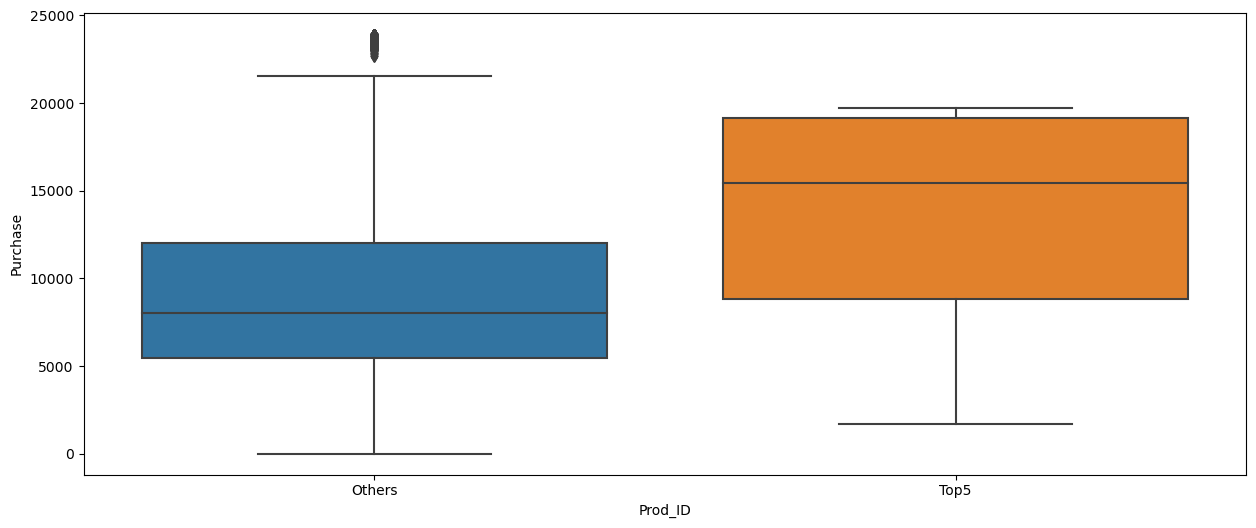

In [38]:
sns.boxplot(x = "Prod_ID", y = "Purchase", data = combined)

## Dropping the unnecessary variables

In [39]:
new = combined.drop(['User_ID', 'Product_ID', 'Stay_In_Current_City_Years'], axis = 1)

In [40]:
new.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City,Prod_ID
0,F,0-17,10,A,0,3,11.0,14.0,8370.0,2.0,Others
1,F,0-17,10,A,0,1,6.0,14.0,15200.0,2.0,Others
2,F,0-17,10,A,0,12,11.0,14.0,1422.0,2.0,Others
3,F,0-17,10,A,0,12,14.0,14.0,1057.0,2.0,Others
4,M,55,16,C,0,8,9.0,15.0,7969.0,4.0,Others


In [41]:
new.Age.unique()

array(['0-17', '55', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [42]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

new["Age_Encoded"] = le.fit_transform(new.Age)

In [43]:
# Applying pd.get_dummies

dummydata = pd.get_dummies(new.drop("Age", axis=1), drop_first=True)

In [44]:
# Split the Data in newtrain and newtest

newtrain = dummydata.loc[0:train.shape[0]-1, :]
newtest = dummydata.loc[train.shape[0]:, :]

print(newtrain.shape, newtest.shape)

(550068, 12) (233599, 12)


In [45]:
# Drop the Purchase variable from new test and define the X and y

newtest = newtest.drop("Purchase", axis = 1)
X = newtrain.drop("Purchase", axis = 1)
y = newtrain.Purchase

## Model building

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'X' contains the features and 'y' contains the target variable 'Purchase'

# Split the data into training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import    AdaBoostRegressor, GradientBoostingRegre

In [ ]:
# Linear regreession

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the model
lr = LinearRegression()

# Train the model
lr.fit(xtrain, ytrain)

# Predict on training and test sets
y_pred_train = lr.predict(xtrain)
y_pred_test = lr.predict(xtest)

# Calculate R2 score for training and test sets
train_r2 = r2_score(ytrain, y_pred_train)
test_r2 = r2_score(ytest, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

# Calculate RMSE for training and test sets
train_rmse = np.sqrt(mean_squared_error(ytrain, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(ytest, y_pred_test))
print("train RMSE ", train_rmse)
print("test RMSE  ", test_rmse)


Train R2  0.13364869327638917
Test R2   0.13206845856092642
train RMSE  4677.791278783058
test RMSE   4669.882663415833


In [73]:
# Linear Regression

pred_lr = lr.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_lr, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("LRMODEL.csv", index=False)

# 4687.193511838603

In [ ]:
# Decision treee

In [57]:
# Initialize the model
dtree = DecisionTreeRegressor()

# Train the model
dtree.fit(xtrain, ytrain)

# Predict on training and test sets
y_pred_train = dtree.predict(xtrain)
y_pred_test = dtree.predict(xtest)

# Calculate R2 score for training and test sets
train_r2 = r2_score(ytrain, y_pred_train)
test_r2 = r2_score(ytest, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

# Calculate RMSE for training and test sets
train_rmse = np.sqrt(mean_squared_error(ytrain, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(ytest, y_pred_test))
print("train RMSE ", train_rmse)
print("test RMSE  ", test_rmse)


Train R2  0.8009997832112883
Test R2   0.5592620631953157
train RMSE  2241.922508455332
test RMSE   3327.7711322607797


In [77]:
# Decision Tree Model

pred_tree = dtree.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_tree, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("TREEMODEL.csv", index=False) 

# 3256.1745641335124

# Random forest

In [63]:
from sklearn.ensemble import   RandomForestRegressor

rf = RandomForestRegressor()

# Initialize the model

# Train the model
rf.fit(xtrain, ytrain)

# Predict on training and test sets
y_pred_train = rf.predict(xtrain)
y_pred_test = rf.predict(xtest)

# Calculate R2 score for training and test sets
train_r2 = r2_score(ytrain, y_pred_train)
test_r2 = r2_score(ytest, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

# Calculate RMSE for training and test sets
train_rmse = np.sqrt(mean_squared_error(ytrain, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(ytest, y_pred_test))
print("train RMSE ", train_rmse)
print("test RMSE  ", test_rmse)


Train R2  0.7904591145087024
Test R2   0.6306006405261102
train RMSE  2300.5316360072898
test RMSE   3046.570986811223


In [60]:
# Random Forest Model

pred_rf = rf.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_rf, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("RFMODEL.csv", index=False) 

# 3008.490038248746

# ADABoost 

In [65]:
from sklearn.ensemble import   AdaBoostRegressor

ada = AdaBoostRegressor()

# Initialize the model

# Train the model
ada.fit(xtrain, ytrain)

# Predict on training and test sets
y_pred_train = ada.predict(xtrain)
y_pred_test = ada.predict(xtest)

# Calculate R2 score for training and test sets
train_r2 = r2_score(ytrain, y_pred_train)
test_r2 = r2_score(ytest, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

# Calculate RMSE for training and test sets
train_rmse = np.sqrt(mean_squared_error(ytrain, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(ytest, y_pred_test))
print("train RMSE ", train_rmse)
print("test RMSE  ", test_rmse)

Train R2  0.40431387971969224
Test R2   0.3991963867170779
train RMSE  3878.846228687879
test RMSE   3885.344218844204


In [67]:
# ADABOOST Regressor

pred_ada = ada.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_ada, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("ADAMODEL.csv", index=False)

# 3822 

# Gradient Boosting

In [66]:
from sklearn.ensemble import   GradientBoostingRegressor

# Initialize the model

gbm = GradientBoostingRegressor()

# Train the model
gbm.fit(xtrain, ytrain)

# Predict on training and test sets
y_pred_train = gbm.predict(xtrain)
y_pred_test = gbm.predict(xtest)

# Calculate R2 score for training and test sets
train_r2 = r2_score(ytrain, y_pred_train)
test_r2 = r2_score(ytest, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

# Calculate RMSE for training and test sets
train_rmse = np.sqrt(mean_squared_error(ytrain, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(ytest, y_pred_test))
print("train RMSE ", train_rmse)
print("test RMSE  ", test_rmse)

Train R2  0.6515127139227617
Test R2   0.6446135137771365
train RMSE  2966.793313971527
test RMSE   2988.2277026406873


In [68]:
# GBM Regressor

pred_gbm = gbm.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_gbm, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("GBMMODEL.csv", index=False) # # XGBM

pred_xgbr = xgb_r.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_xgbr, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("XGBMODEL.csv", index=False) 

# 28662980

## Tunning XGB Regressor

In [73]:
from sklearn.model_selection import GridSearchCV

params = [{"learning_rate":[0.1, 0.2, 0.01, 0.3, 0.5],
          "max_depth":[4, 5, 6, 8]}]

xgb_r = xgb.XGBRegressor()

In [74]:
grid = GridSearchCV(estimator=xgb_r, param_grid=params, cv = 5)

# Fitting the Grid Search Model
grid.fit(X, y)

#Printing the best parameters..
print(grid.best_params_)

{'learning_rate': 0.3, 'max_depth': 8}


In [75]:
import xgboost as xgb

# Initialize the model

xgb_r = xgb.XGBRegressor()

# Train the model
xgb_r.fit(xtrain, ytrain)

# Predict on training and test sets
y_pred_train = xgb_r.predict(xtrain)
y_pred_test = xgb_r.predict(xtest)

# Calculate R2 score for training and test sets
train_r2 = r2_score(ytrain, y_pred_train)
test_r2 = r2_score(ytest, y_pred_test)
print('Train R2 ', train_r2)
print('Test R2  ', test_r2)

# Calculate RMSE for training and test sets
train_rmse = np.sqrt(mean_squared_error(ytrain, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(ytest, y_pred_test))
print("train RMSE ", train_rmse)
print("test RMSE  ", test_rmse)

Train R2  0.6830630817057111
Test R2   0.6686503971321636
train RMSE  2829.308067079494
test RMSE   2885.40287418165


In [80]:
# Lets Build a Tuned Model
xgb_r = xgb.XGBRegressor(learning_rate = 0.3, max_depth = 8)

pred_xgbr = xgb_r.fit(X, y).predict(newtest)
solution = pd.DataFrame({"Purchase":pred_xgbr, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("XGBTunedMODEL.csv", index=False) # 2838

In [81]:
df = pd.DataFrame(data = xgb_r.feature_importances_, 
                  columns = ["Feat_imp"], index = xgb_r.feature_names_in_)

In [82]:
df

,Feat_imp
Occupation,0.006609
Product_Category_1,0.821753
Product_Category_2,0.018659
Product_Category_3,0.017142
Stay_In_Current_City,0.006656
Age_Encoded,0.007509
Gender_M,0.009115
City_Category_B,0.007334
City_Category_C,0.015286
Marital_Status_1,0.006600


<Axes: >

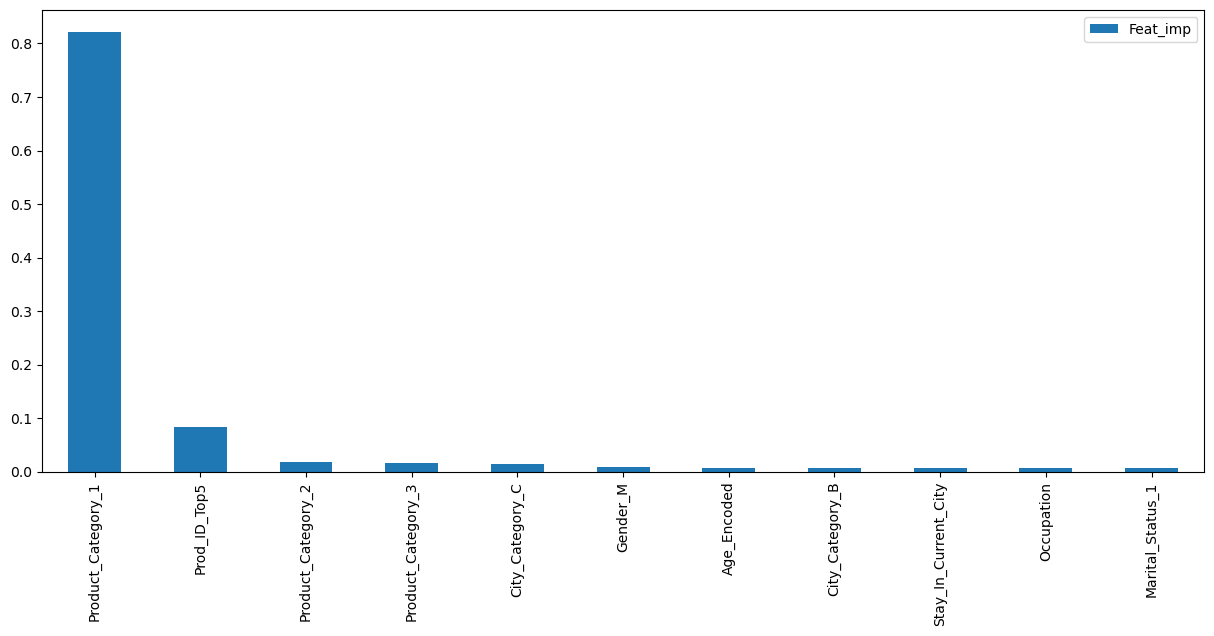

In [83]:
df.sort_values(by = "Feat_imp", ascending = False,kind = "quicksort").plot(kind = "bar")

In [84]:

# Selecting Top2 Features
subset = X.loc[:, ["Product_Category_1", "Prod_ID_Top5"]]

In [85]:
# Lets Build a Tuned Model on Subset of the Data
xgb_r = xgb.XGBRegressor(learning_rate = 0.3, max_depth = 8)

pred_xgbr = xgb_r.fit(subset, y).predict(newtest.loc[:, ["Product_Category_1", 
                                                         "Prod_ID_Top5"]])
solution = pd.DataFrame({"Purchase":pred_xgbr, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("XGBSubsetMODEL.csv", index=False) # 3026

## Cross Validation Model - XGB

In [86]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True)

xgbr = xgb.XGBRegressor(learning_rate = 0.3, max_depth = 8)
pred_model = pd.DataFrame()

n = 10
for i in range(n):
    folds = next(kfold.split(X)) # Splitting the data in even groups...
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    pred_model[i] = xgbr.fit(xtrain, ytrain).predict(newtest)

In [87]:
XGB_cv = pred_model.mean(axis=1)

solution = pd.DataFrame({"Purchase":XGB_cv, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("XGB_CV25.csv", index=False) # 2831

In [88]:
solution

,Purchase,User_ID,Product_ID
0,15185.346680,1000004,P00128942
1,10783.646484,1000009,P00113442
2,6741.939941,1000010,P00288442
3,2833.844482,1000010,P00145342
4,2758.053711,1000011,P00053842
...,...,...,...
233594,7037.967773,1006036,P00118942
233595,6009.509766,1006036,P00254642
233596,12857.725586,1006036,P00031842
233597,19911.230469,1006037,P00124742


# Conclusion



- The Best Model is XGB with CV =10 and Learning Rate = 0.3 and Max Depth = 8.